# Content

<ul>
    <li> Dataframes </li>
    <li> Training </li>
</ul>

## Indroduction

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

This notebook is goes through the newtons law cooling model. We first explore the newtons cooling law equation, and solve the equation using eulers method. This provides a list of inputs (time, initial temp) corresponding to a temperature output. This would provide a simulation of a newtons cooling law. This simulation data is saved as a csv to be used later on for training the neural network. A comparision would be made to measure theaccuracy of the predictions made by the neural network compared to the data and actual equations.

## Dataframes

To begin with we going to be looking at the simulation, solved using euler methods. This is done using a delta time steps of 1.

In [2]:
newtons_law_df = pd.DataFrame(data = pd.read_csv("../../data/train/newtons_cooling_law.csv", usecols=[0,1,2]))
newtons_law_df

,x_0,x,y
0,1,0,1.000000
1,1,1,1.315000
2,1,2,1.625275
3,1,3,1.930896
4,1,4,2.231932
...,...,...,...
11995,60,195,23.994567
11996,60,196,23.964648
11997,60,197,23.935178
11998,60,198,23.906151


This simulations data is put into the neural network. The predictions of the neural network provided the list of data which is shown below

In [3]:
newtons_law_df_preds = pd.DataFrame(data = pd.read_csv("../../data/preds/train/newtons_cooling_law.csv", usecols=[0,1,2]))
newtons_law_df_preds 

,initial_temp,time,temp
0,1,0,0.992293
1,1,1,0.627627
2,1,2,1.360283
3,1,3,2.110445
4,1,4,2.512200
...,...,...,...
11995,60,195,23.862244
11996,60,196,23.816486
11997,60,197,23.770756
11998,60,198,23.725002


To allow us to make a comparision between the predictions and the actual simulations. The first thing we need to do is merge the 2 dataframes together

In [4]:
newtons_law_df = newtons_law_df.astype("float64")
newtons_law_df_compare = pd.merge(newtons_law_df, newtons_law_df_preds, right_index=True, left_index=True)
newtons_law_df_compare

,x_0,x,y,initial_temp,time,temp
0,1.0,0.0,1.000000,1,0,0.992293
1,1.0,1.0,1.315000,1,1,0.627627
2,1.0,2.0,1.625275,1,2,1.360283
3,1.0,3.0,1.930896,1,3,2.110445
4,1.0,4.0,2.231932,1,4,2.512200
...,...,...,...,...,...,...
11995,60.0,195.0,23.994567,60,195,23.862244
11996,60.0,196.0,23.964648,60,196,23.816486
11997,60.0,197.0,23.935178,60,197,23.770756
11998,60.0,198.0,23.906151,60,198,23.725002


The second thing we need to do to allow us to make a comparision. Is to "melt" the dataframe. This would create a temp column which will be used as a categorical column with the data either being data or preds. This is used to identify is the row is a predicted data, or the actual simulated data.

In [5]:
newtons_law_df_compare = newtons_law_df_compare.rename(columns={"y": "data", "temp" : "preds"})
newtons_law_df_compare = newtons_law_df_compare.melt(["x_0","x","initial_temp","time"], var_name='temp', value_name='vals')
newtons_law_df_compare

,x_0,x,initial_temp,time,temp,vals
0,1.0,0.0,1,0,data,1.000000
1,1.0,1.0,1,1,data,1.315000
2,1.0,2.0,1,2,data,1.625275
3,1.0,3.0,1,3,data,1.930896
4,1.0,4.0,1,4,data,2.231932
...,...,...,...,...,...,...
23995,60.0,195.0,60,195,preds,23.862244
23996,60.0,196.0,60,196,preds,23.816486
23997,60.0,197.0,60,197,preds,23.770756
23998,60.0,198.0,60,198,preds,23.725002


## Visulising the data

This is will show the newtons law dataframe graph. 

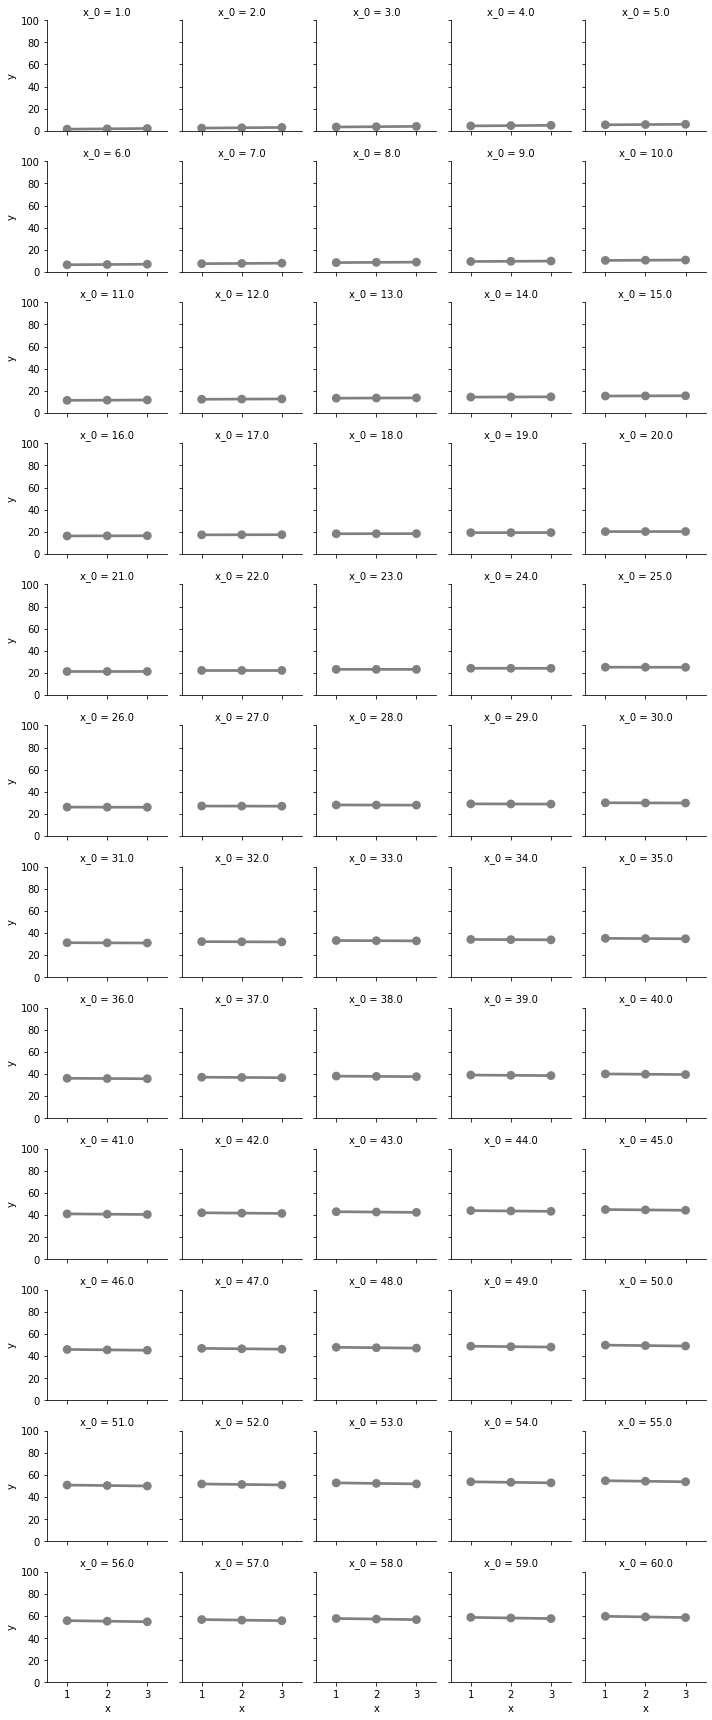

In [6]:
g = sns.FacetGrid(newtons_law_df, col="x_0",col_wrap=5, height=2, ylim=(0, 100))
g.map(sns.pointplot, "x", "y", order=[1, 2, 3], color=".5", ci=None)

Above shows a grid graph. Each graph within a grid repersents an initial time graph

Below will show a grid graph of the predictions

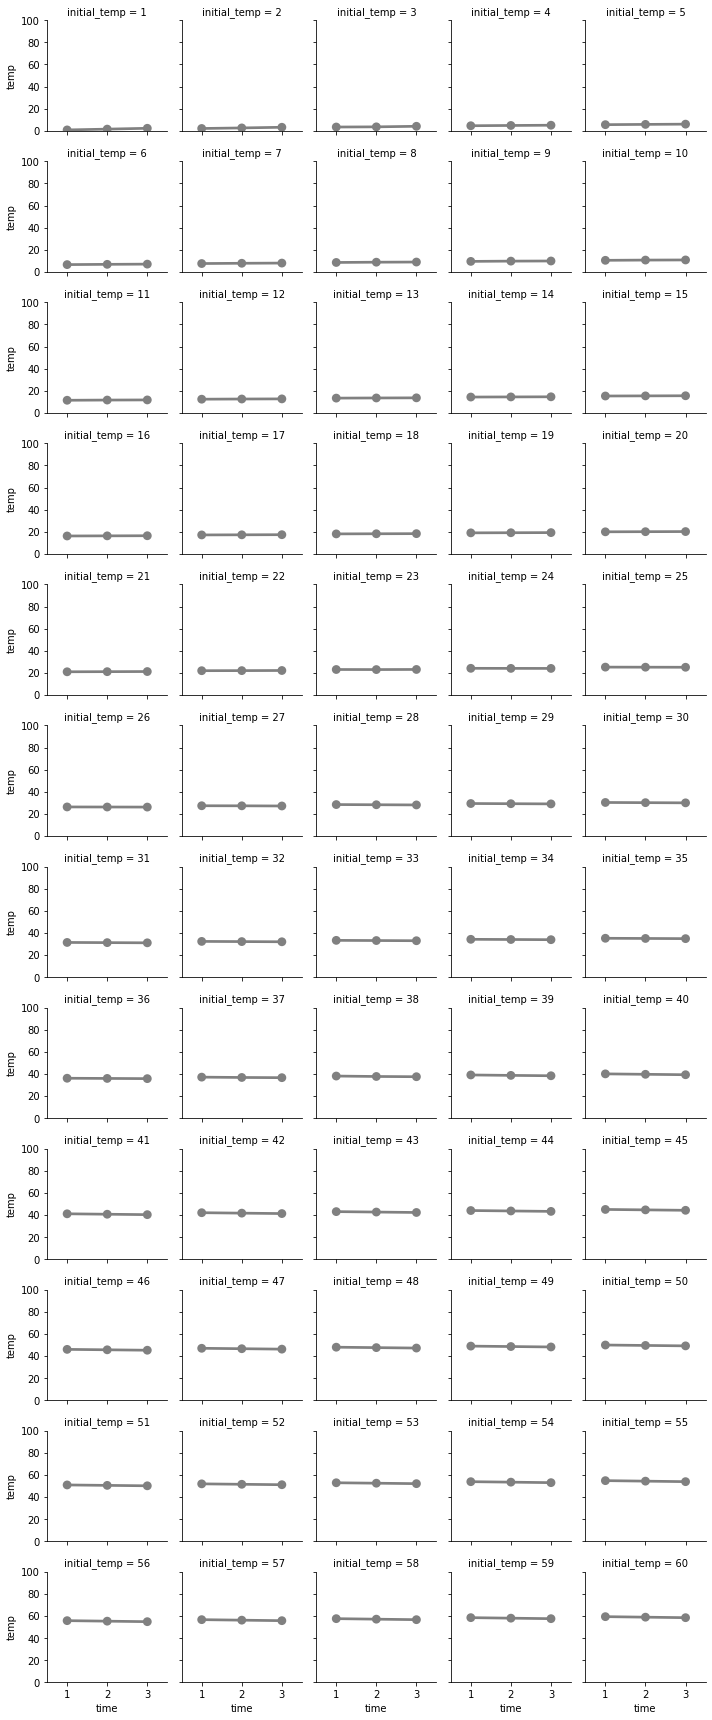

In [7]:
g = sns.FacetGrid(newtons_law_df_preds, col="initial_temp",col_wrap=5, height=2, ylim=(0, 100))
g.map(sns.pointplot, "time", "temp", order=[1, 2, 3], color=".5", ci=None)

Below would show a categorical graph defined by initial temp as a category and the temperature on the y axises.

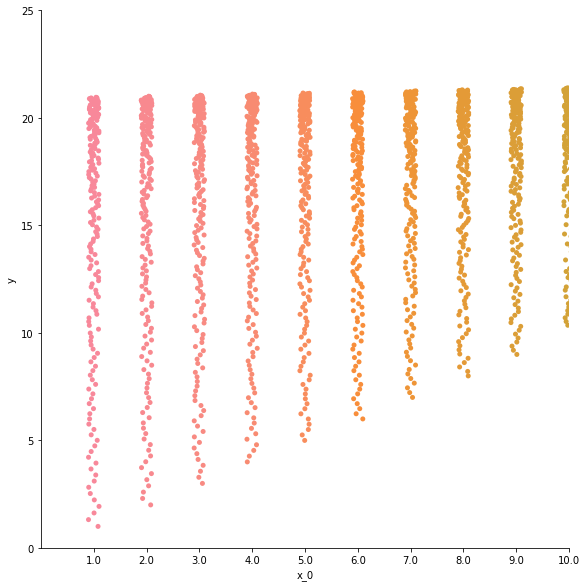

In [8]:
sns.catplot(height=8, data=newtons_law_df, x="x_0", y="y").set(xlim=(-1,9), ylim=(0,25))

Below will show the categorial graph for the predictions of the neural network

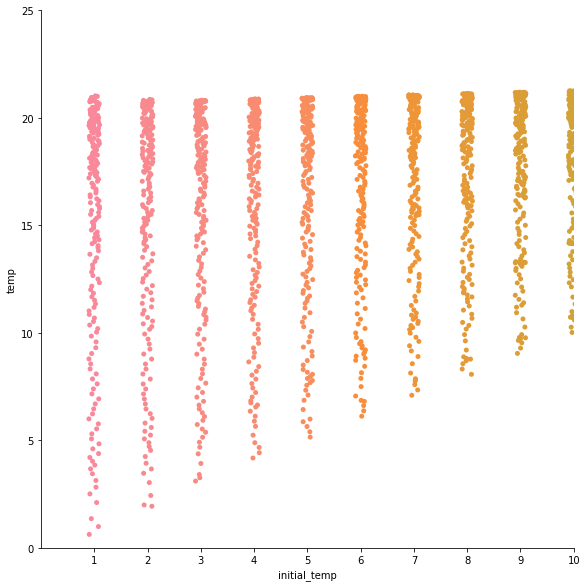

In [9]:
sns.catplot(height=8, data=newtons_law_df_preds, x="initial_temp", y="temp").set(xlim=(-1,9), ylim=(0,25))

### Combining both 

we want to combine both of these data to begin visulising it

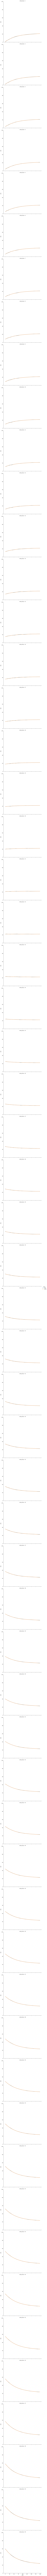

In [12]:
g = sns.FacetGrid(newtons_law_df_compare, hue="temp", col="initial_temp",col_wrap=1, height=8, ylim=(0, 100))
g.map(sns.lineplot, "time", "vals", ci=None)
g.add_legend()

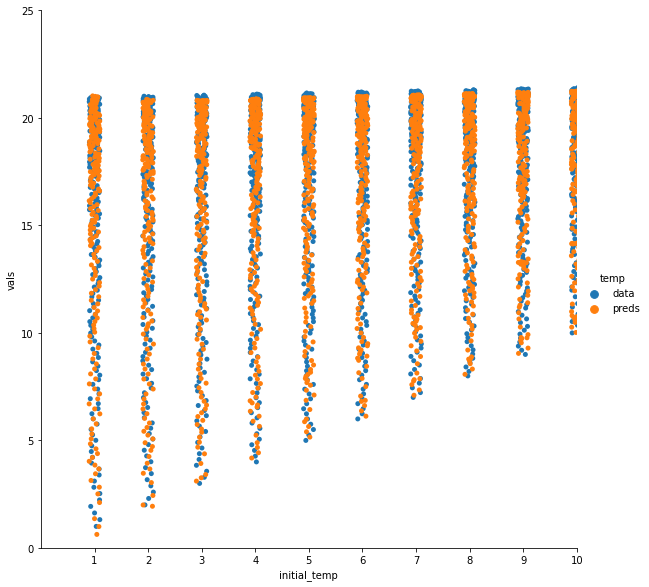

In [11]:
sns.catplot(height=8, data=newtons_law_df_compare, x="initial_temp", y="vals", hue="temp").set(xlim=(-1,9), ylim=(0,25))